In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')



csv_path = '/content/drive/My Drive/Thesis/heart_2020_cleaned.csv'
df = pd.read_csv(csv_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
# Class Distribution for Target Variable
print("\nClass Distribution (HeartDisease):")
print(df['HeartDisease'].value_counts())




Class Distribution (HeartDisease):
HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


In [6]:
print("\nData Types:")
print(df.dtypes)


Data Types:
HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object


In [ ]:
df=pd.read_csv(csv_path)
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


**Categorical Data**

This bar chart represents the count of individuals with and without heart disease. A significantly larger number of individuals do not have heart disease compared to those who do.

<ipython-input-56-1afc23a11a73>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="HeartDisease", palette="viridis")


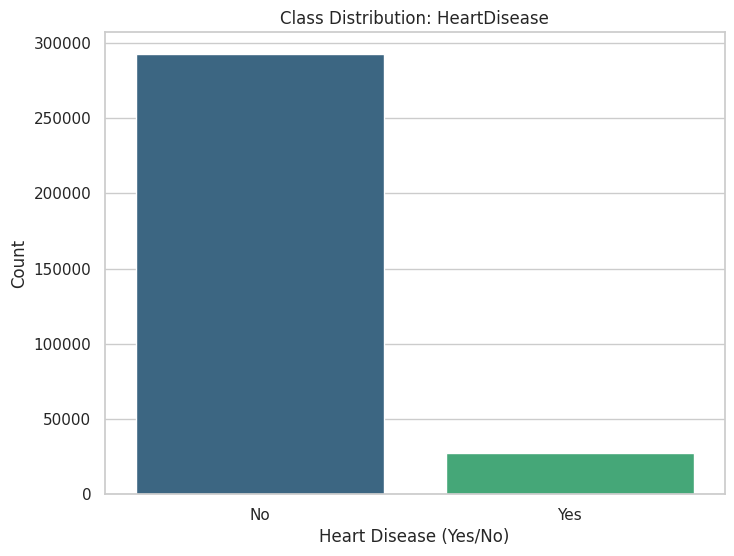

In [ ]:
#  Class Distribution for HeartDisease
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sns.countplot(data=df, x="HeartDisease", palette="viridis")
plt.title("Class Distribution: HeartDisease")
plt.xlabel("Heart Disease (Yes/No)")
plt.ylabel("Count")
plt.show()

**this bar chart shows that older age groups have a higher occurrence of heart disease, then age is a significant factor.**

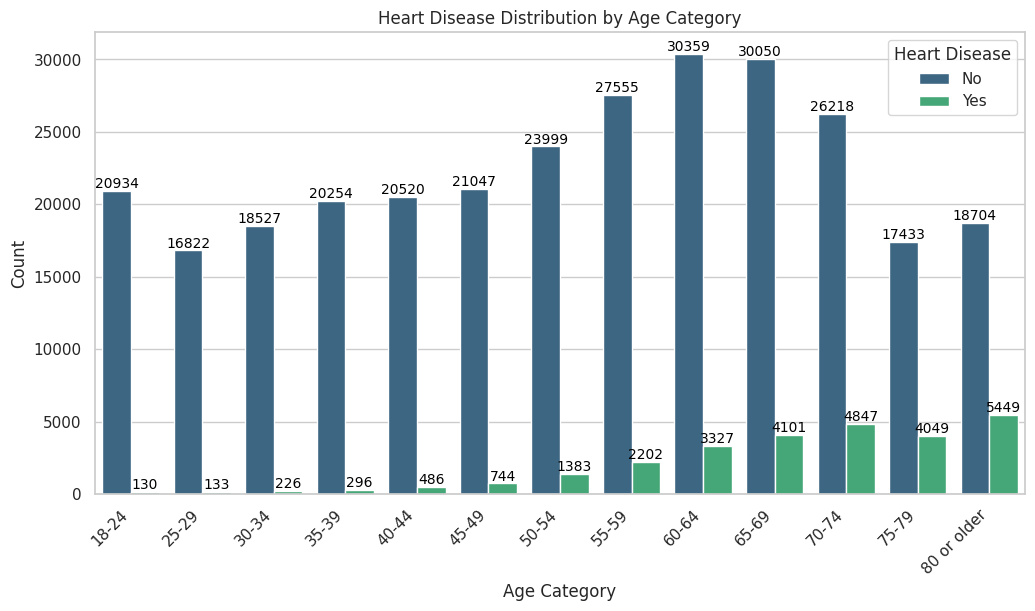

In [ ]:
# Bar Chart: Heart Disease distribution by Age Category

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

ax = sns.countplot(data=df, x="AgeCategory", hue="HeartDisease", palette="viridis", order=sorted(df["AgeCategory"].unique()))
plt.title("Heart Disease Distribution by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')


for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.legend(title="Heart Disease")
plt.show()

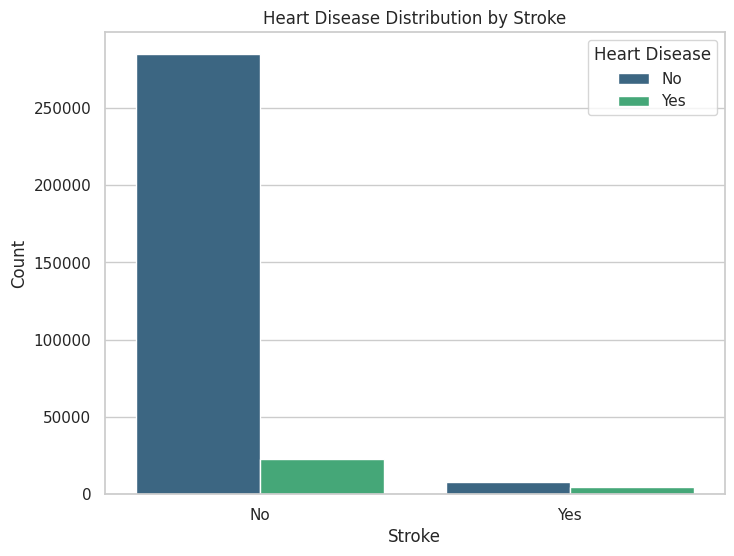

In [ ]:

plt.figure(figsize=(8, 6))

sns.countplot(data=df, x="Stroke", hue="HeartDisease", palette="viridis")
plt.title("Heart Disease Distribution by Stroke")
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()

**this bar chart shows that smoking also significant factor for heart disease.**

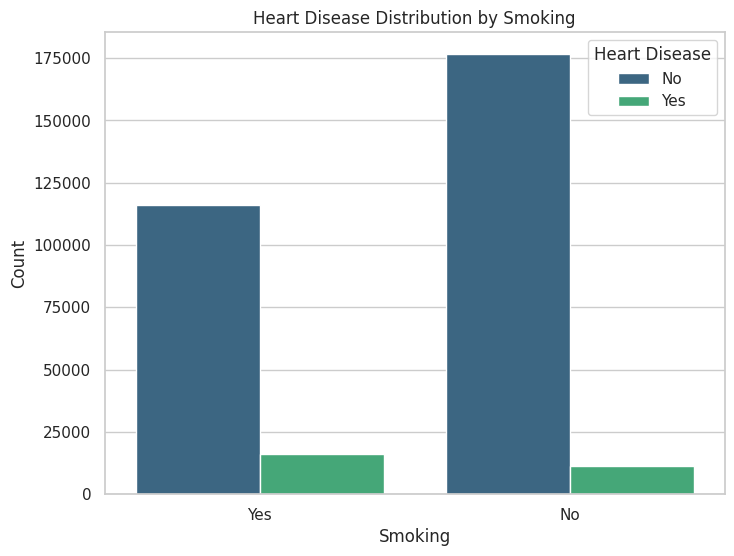

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sns.countplot(data=df, x="Smoking", hue="HeartDisease", palette="viridis")
plt.title("Heart Disease Distribution by Smoking")
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()

**this count plot show male is more prone to heart disease than female.**

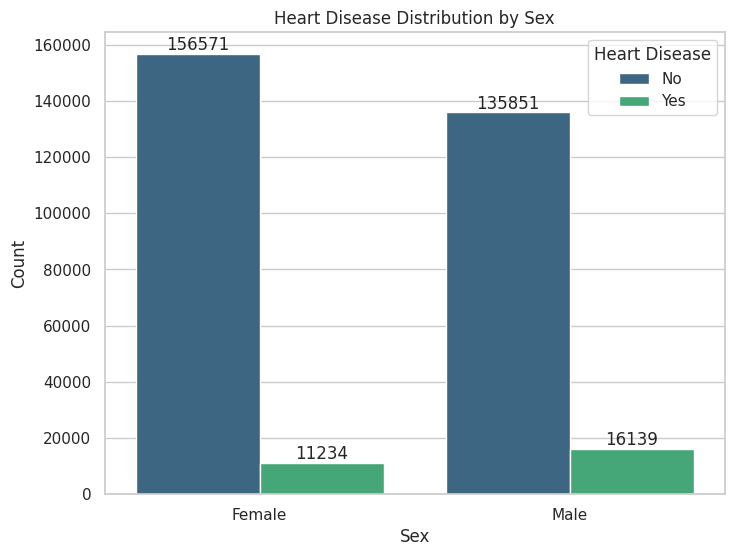

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="Sex", hue="HeartDisease", palette="viridis")
plt.title("Heart Disease Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Heart Disease")


for container in ax.containers:
  ax.bar_label(container)

plt.show()


<ipython-input-61-e204195ac68c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="GenHealth", order=data["GenHealth"].value_counts().index, palette="viridis")


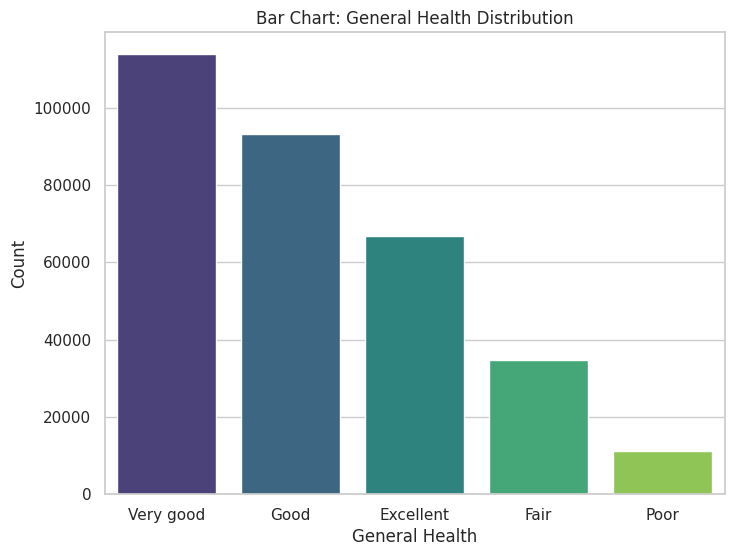

In [ ]:
# Bar Chart: General Health Distribution

data = pd.read_csv(csv_path)

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="GenHealth", order=data["GenHealth"].value_counts().index, palette="viridis")
plt.title("Bar Chart: General Health Distribution")
plt.xlabel("General Health")
plt.ylabel("Count")
plt.show()

 **Heart Disease distribution by Diabetic**

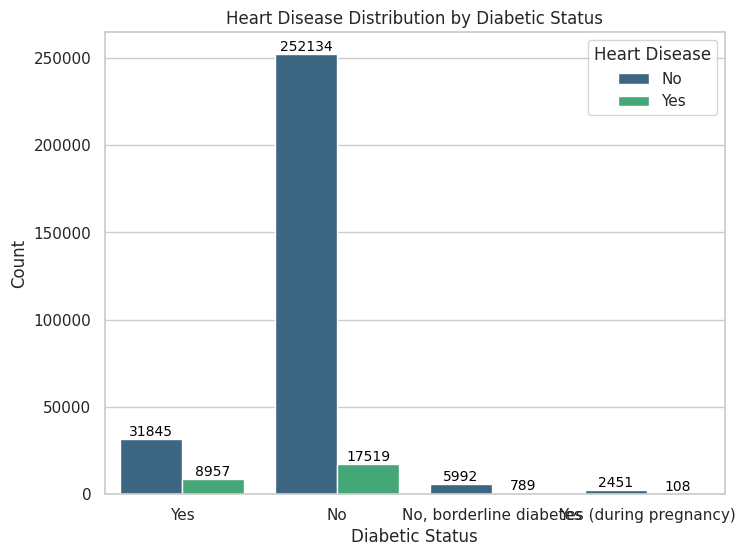

In [ ]:


plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x="Diabetic", hue="HeartDisease", palette="viridis")
plt.title("Heart Disease Distribution by Diabetic Status")
plt.xlabel("Diabetic Status")
plt.ylabel("Count")


for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.legend(title="Heart Disease")
plt.show()

 **Heart Disease distribution by Asthma**

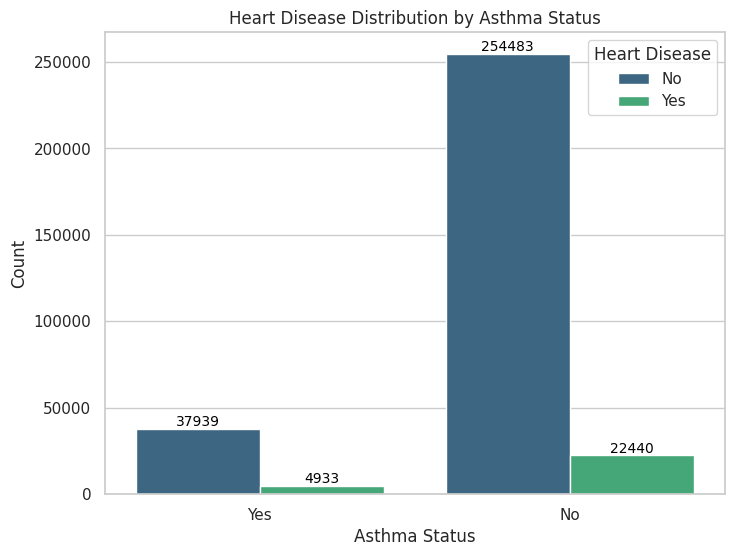

In [ ]:


plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x="Asthma", hue="HeartDisease", palette="viridis")
plt.title("Heart Disease Distribution by Asthma Status")
plt.xlabel("Asthma Status")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')
plt.legend(title="Heart Disease")
plt.show()

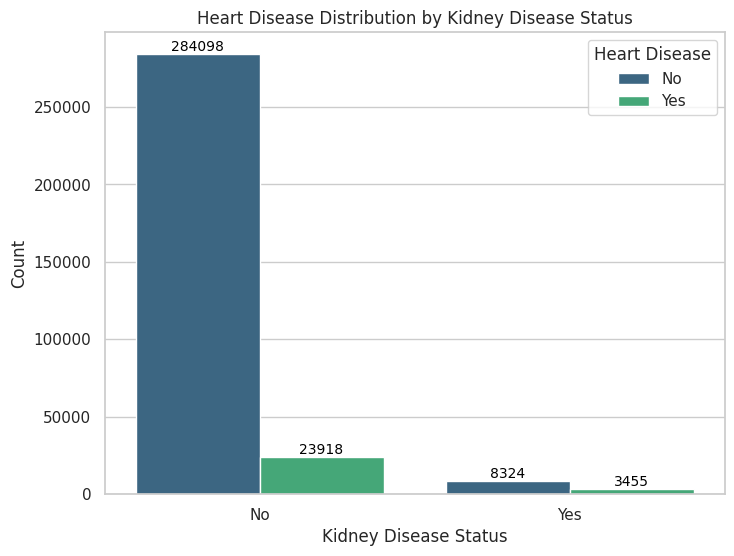

In [ ]:
# Bar Chart: Heart Disease distribution by Kidney Disease

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x="KidneyDisease", hue="HeartDisease", palette="viridis")
plt.title("Heart Disease Distribution by Kidney Disease Status")
plt.xlabel("Kidney Disease Status")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')
plt.legend(title="Heart Disease")
plt.show()

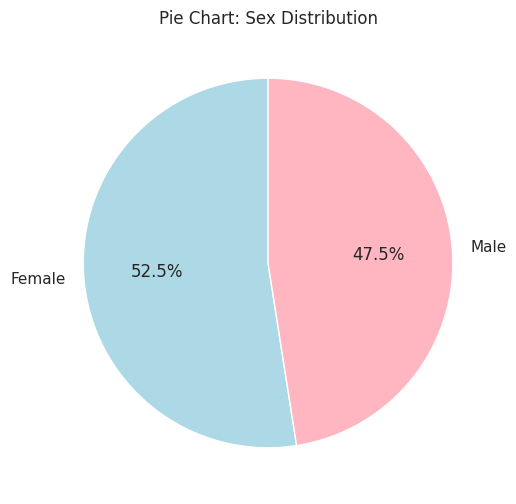

In [ ]:
# Pie Chart: Sex Distribution

sex_counts = data["Sex"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightblue", "lightpink"])
plt.title("Pie Chart: Sex Distribution")
plt.show()

### Numerical Data

**Correlation Between Numerical Variables**

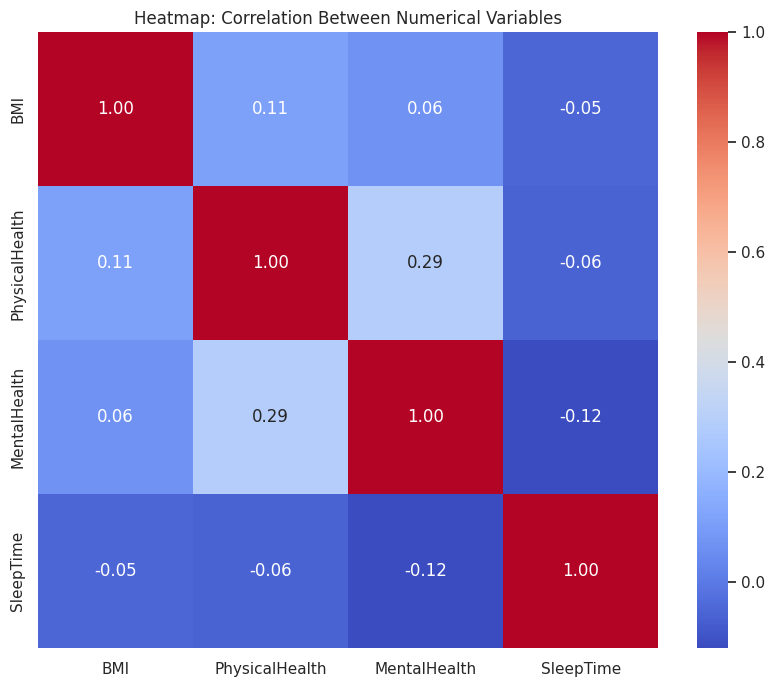

In [ ]:

numerical_data = data.select_dtypes(include=["float64"])
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap: Correlation Between Numerical Variables")
plt.show()

 **BMI Distribution**

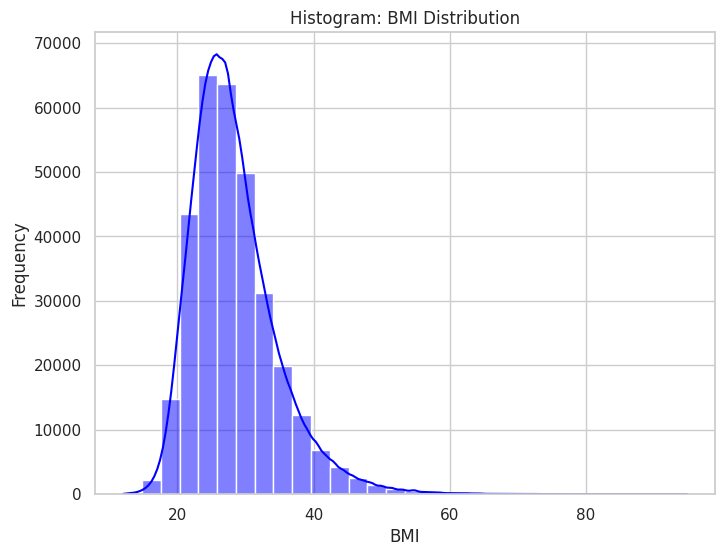

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(data["BMI"], bins=30, kde=True, color="blue")
plt.title("Histogram: BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

## Bivariant Analysis

**Scatter plot(Numerical-Numerical)**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


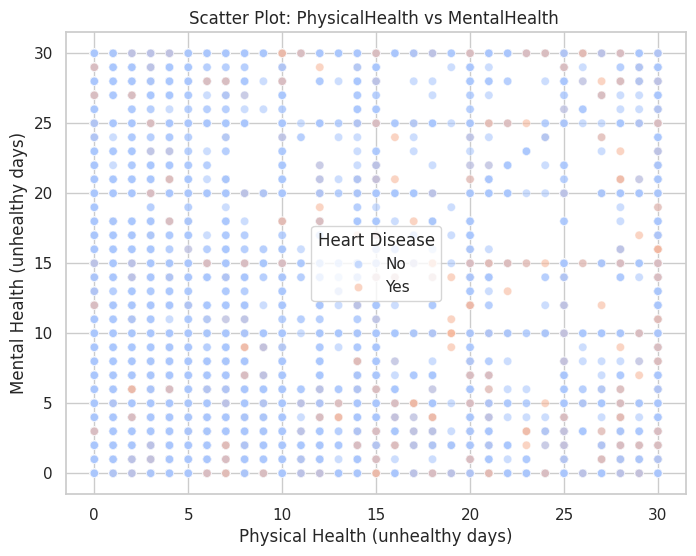

In [ ]:
sns.set(style="whitegrid")
data = df

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="PhysicalHealth", y="MentalHealth", hue="HeartDisease", alpha=0.6,palette='coolwarm')
plt.title("Scatter Plot: PhysicalHealth vs MentalHealth ")
plt.xlabel('Physical Health (unhealthy days)')
plt.ylabel('Mental Health (unhealthy days)')
plt.legend(title='Heart Disease')
plt.show()

Text(0, 0.5, 'Sleep Time (hours)')

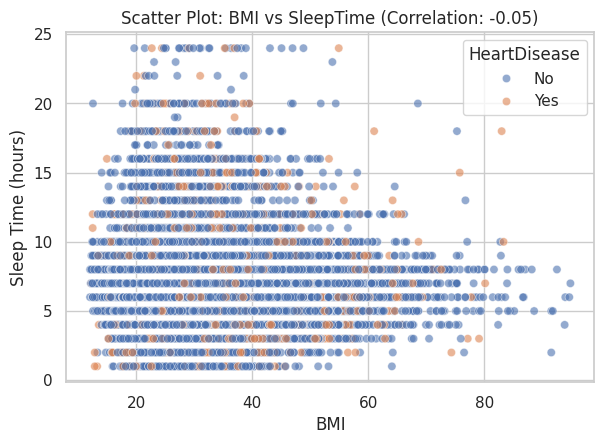

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_bmi_sleep = data['BMI'].corr(data['SleepTime'])
# Visualization
plt.figure(figsize=(15, 10))
# Scatter plot for BMI vs SleepTime
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='BMI', y='SleepTime', hue='HeartDisease', alpha=0.6)
plt.title(f"Scatter Plot: BMI vs SleepTime (Correlation: {correlation_bmi_sleep:.2f})")
plt.xlabel("BMI")
plt.ylabel("Sleep Time (hours)")

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


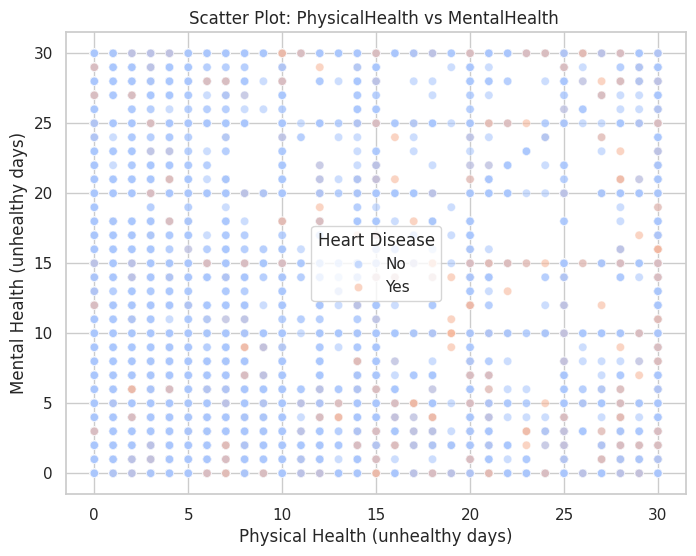

In [ ]:


sns.set(style="whitegrid")
data = df

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="PhysicalHealth", y="MentalHealth", hue="HeartDisease", alpha=0.6,palette='coolwarm')
plt.title("Scatter Plot: PhysicalHealth vs MentalHealth ")
plt.xlabel('Physical Health (unhealthy days)')
plt.ylabel('Mental Health (unhealthy days)')
plt.legend(title='Heart Disease')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


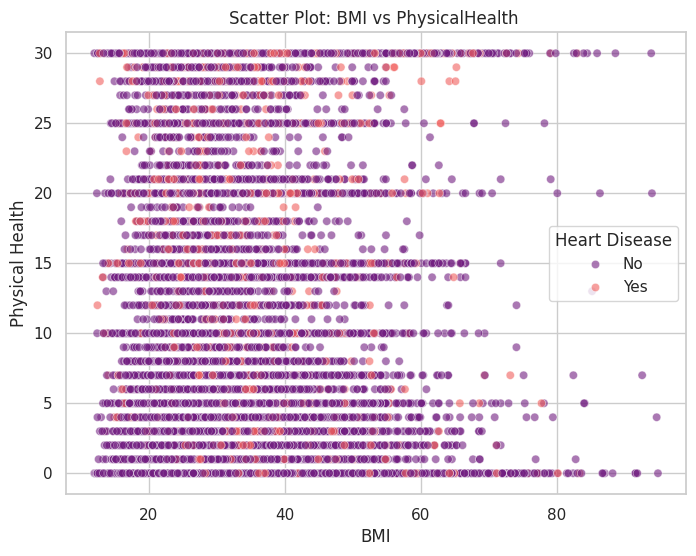

In [ ]:


sns.set(style="whitegrid")
data = df

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="BMI", y="PhysicalHealth", hue="HeartDisease", alpha=0.6,palette='magma')
plt.title("Scatter Plot: BMI vs PhysicalHealth ")
plt.xlabel('BMI')
plt.ylabel('Physical Health')
plt.legend(title='Heart Disease')
plt.show()

## Bar Chart(Numerical-Categorical)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

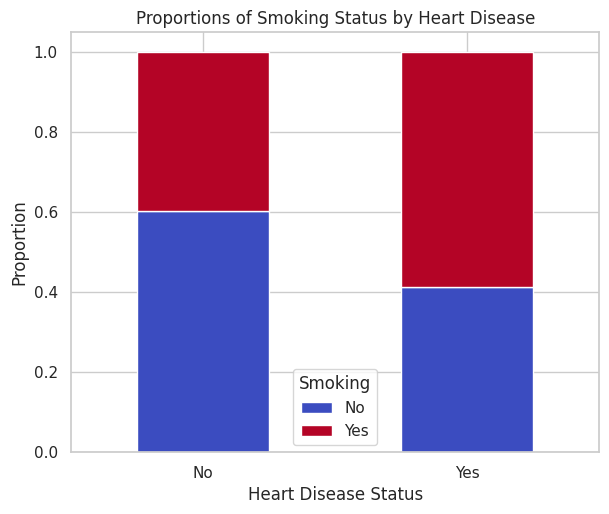

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

smoking_heart_disease = data.groupby('HeartDisease')['Smoking'].value_counts(normalize=True).unstack()

plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
smoking_heart_disease.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())
plt.title("Proportions of Smoking Status by Heart Disease")
plt.xlabel("Heart Disease Status")
plt.ylabel("Proportion")
plt.xticks(rotation=0)

**bar chart(Categorical-Numerical)**

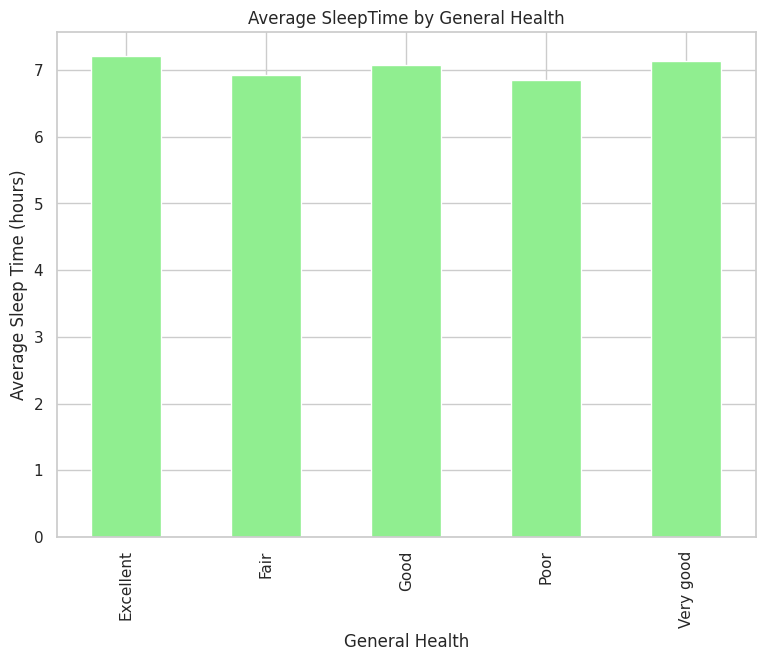

In [ ]:


avg_sleep_gen_health = data.groupby('GenHealth')['SleepTime'].mean()

plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 2)
avg_sleep_gen_health.plot(kind='bar', color='lightgreen', ax=plt.gca())
plt.title("Average SleepTime by General Health")
plt.xlabel("General Health")
plt.ylabel("Average Sleep Time (hours)")

plt.tight_layout()
plt.show()

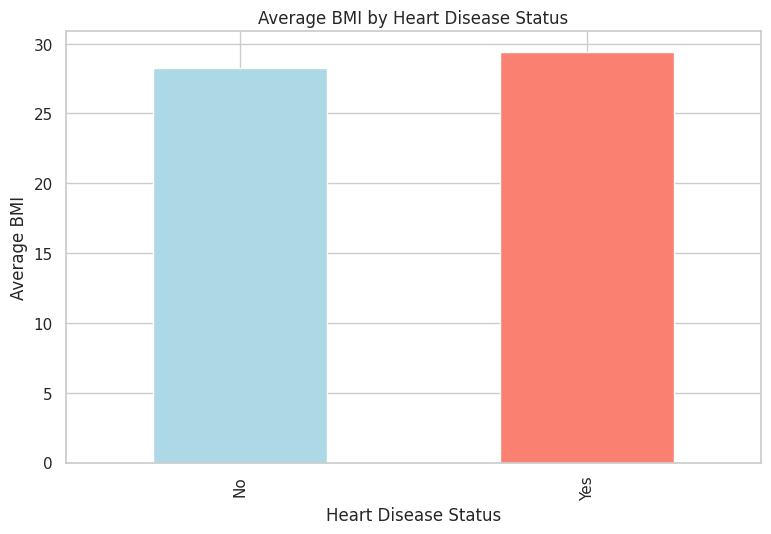

In [ ]:


avg_bmi_heart_disease = data.groupby('HeartDisease')['BMI'].mean()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 3)
avg_bmi_heart_disease.plot(kind='bar', color=['lightblue', 'salmon'], ax=plt.gca())
plt.title("Average BMI by Heart Disease Status")
plt.xlabel("Heart Disease Status")
plt.ylabel("Average BMI")

plt.tight_layout()
plt.show()

**cluster map**

<Figure size 800x600 with 0 Axes>

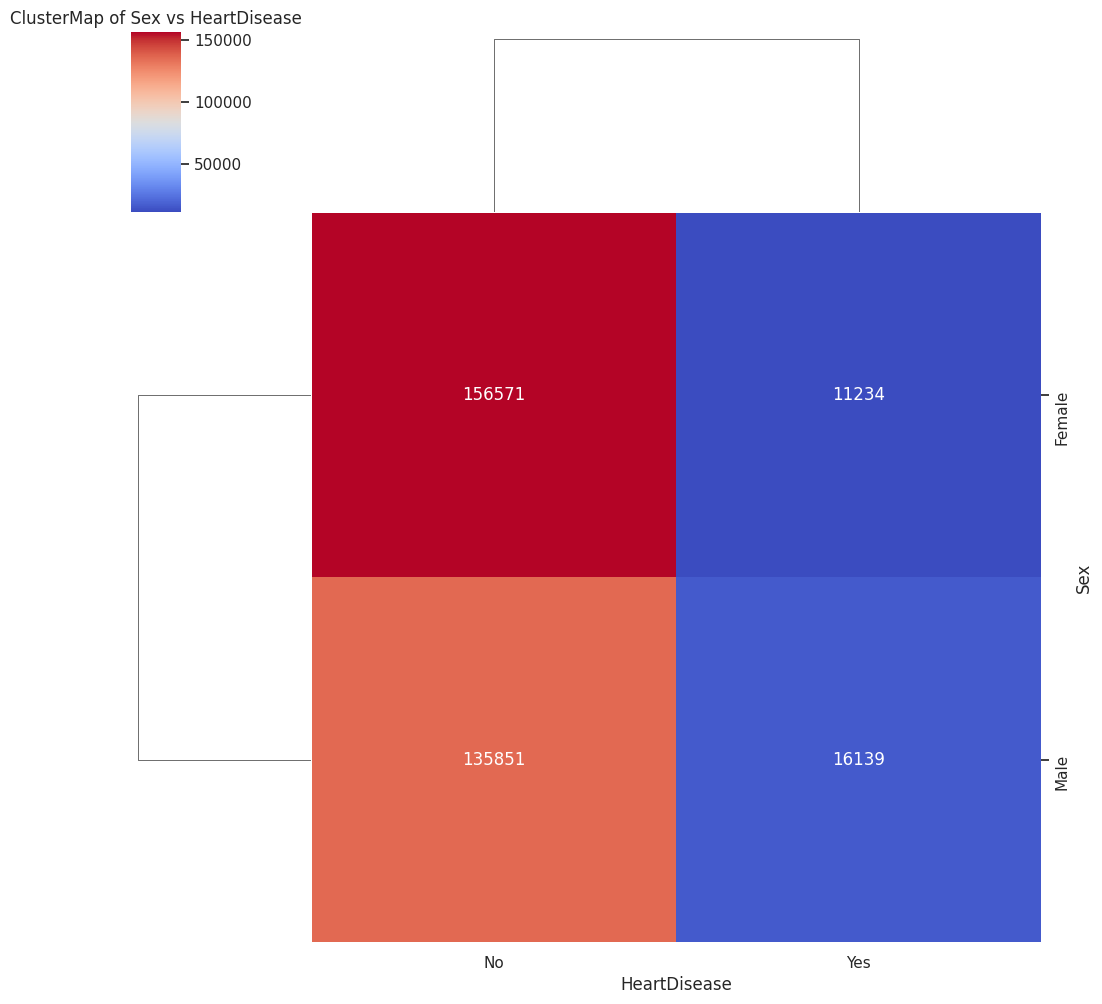

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


contingency_table = pd.crosstab(df['Sex'], df['HeartDisease'])

plt.figure(figsize=(8, 6))
sns.clustermap(contingency_table, annot=True, fmt='d', cmap='coolwarm', cbar=True)

plt.title('ClusterMap of Sex vs HeartDisease')
plt.show()

# Data Preprocessing

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


there is no null values.


**Plot boxplot and identify outliers.**

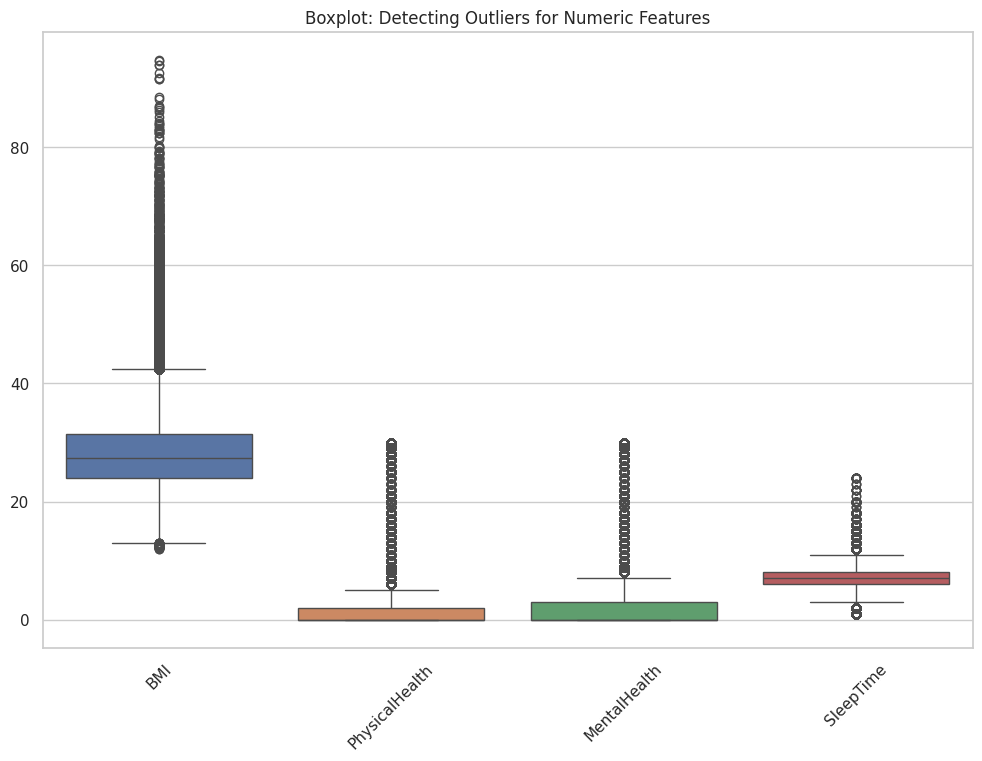

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_data = data.select_dtypes(include=['float64'])

#  boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_data)
plt.title('Boxplot: Detecting Outliers for Numeric Features')
plt.xticks(rotation=45)
plt.show()

There is a huge outliers in BMI, physicalhealth, menatalHealth and sleeptime

In [ ]:

print("\nClass Distribution (HeartDisease):")
print(df['HeartDisease'].value_counts())


Class Distribution (HeartDisease):
HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


**dataset is imbalance... then We apply the Smoat method to balance the dataset**

**Encode categorical features**

In [ ]:

categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

**Split the dataset into features (X) and target (y)**

In [ ]:
#  Split the dataset into features (X) and target (y)

from sklearn.model_selection import train_test_split
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print("Class distribution before SMOTE (Training Data):")
print(y_train.value_counts())
print("\nClass distribution before SMOTE (Testing Data):")
print(y_test.value_counts())

Class distribution before SMOTE (Training Data):
HeartDisease
0    234055
1     21781
Name: count, dtype: int64

Class distribution before SMOTE (Testing Data):
HeartDisease
0    58367
1     5592
Name: count, dtype: int64


**Apply SMOTE only on the training set since the dataset is imbalance**

In [ ]:

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

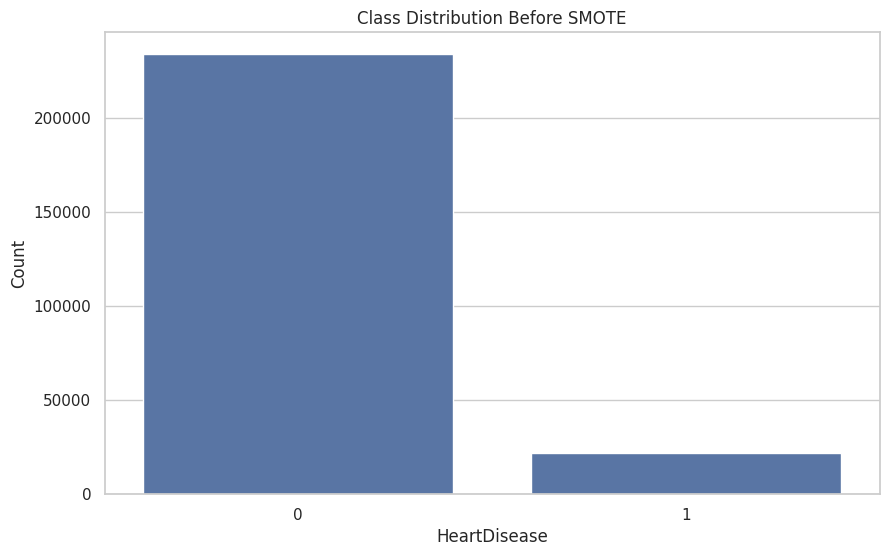

Class distribution before SMOTE (Training Data):
HeartDisease
0    234055
1     21781
Name: count, dtype: int64

Class distribution before SMOTE (Testing Data):
HeartDisease
0    58367
1     5592
Name: count, dtype: int64


<ipython-input-75-64aac7fa0127>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette="viridis")


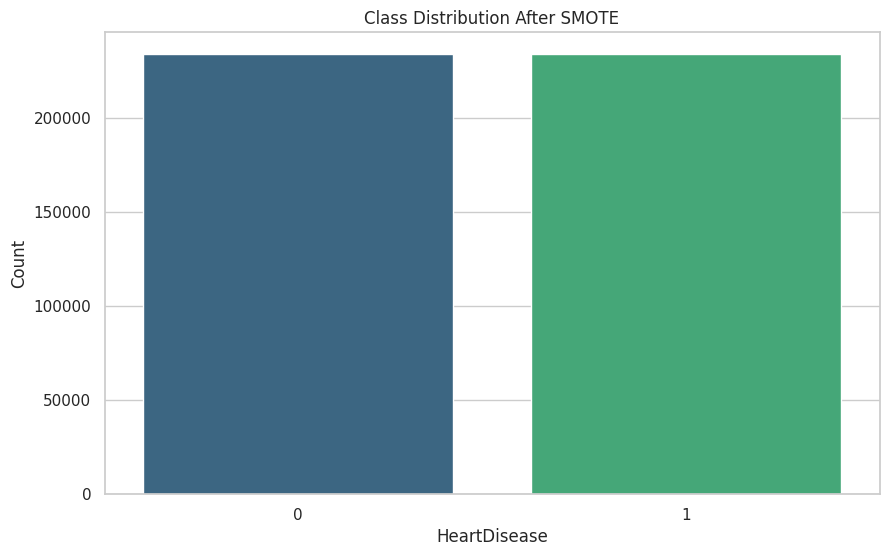

Class distribution after SMOTE (Training Data):
HeartDisease
0    234055
1    234055
Name: count, dtype: int64

Class distribution after SMOTE (Testing Data):
HeartDisease
0    58367
1     5592
Name: count, dtype: int64


In [ ]:

# Plot before SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.show()

print("Class distribution before SMOTE (Training Data):")
print(y_train.value_counts())
print("\nClass distribution before SMOTE (Testing Data):")
print(y_test.value_counts())

# Plot after SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_resampled, palette="viridis")
plt.title('Class Distribution After SMOTE')
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.show()

print("Class distribution after SMOTE (Training Data):")
print(y_train_resampled.value_counts())
print("\nClass distribution after SMOTE (Testing Data):")
print(y_test.value_counts())


**Standardize the data (scaling)**

Fit and transform on training data and  Only transform the test data.


In [ ]:


scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [ ]:

X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
print("first few row after scale\n",X_train_resampled_df.head())
print("\n description \n",X_train_resampled_df.describe())



first few row after scale
         BMI   Smoking  AlcoholDrinking    Stroke  PhysicalHealth  \
0 -0.851703  1.150277        -0.201977 -0.207343       -0.538399   
1 -0.211604  1.150277        -0.201977  4.822934        2.468145   
2  0.598980 -0.869356        -0.201977 -0.207343       -0.337962   
3  0.386648 -0.869356        -0.201977 -0.207343       -0.538399   
4 -0.650219  1.150277        -0.201977 -0.207343       -0.337962   

   MentalHealth  DiffWalking       Sex  AgeCategory     Race  Diabetic  \
0     -0.492640     -0.47151  1.059066     1.006443  0.47043 -0.544478   
1     -0.492640     -0.47151  1.059066    -0.196624  0.47043 -0.544478   
2     -0.257842     -0.47151  1.059066    -0.497390 -1.23758 -0.544478   
3     -0.492640     -0.47151 -0.944229    -2.001224  0.47043 -0.544478   
4      0.681353     -0.47151  1.059066     1.307210  0.47043  1.911160   

   PhysicalActivity  GenHealth  SleepTime    Asthma  KidneyDisease  SkinCancer  
0          0.715124   1.351366  -0.071

In [ ]:


X_test_df = pd.DataFrame(X_test, columns=X_train.columns)

print("first few row after scale in test data\n",X_test_df.head())
print("\n \ndescription \n",X_test_df.describe())

first few row after scale in test data
         BMI   Smoking  AlcoholDrinking    Stroke  PhysicalHealth  \
0 -0.185256  1.150277        -0.201977 -0.207343       -0.538399   
1 -1.065586 -0.869356        -0.201977 -0.207343       -0.538399   
2  0.386648  1.150277        -0.201977 -0.207343       -0.538399   
3  1.786185 -0.869356        -0.201977 -0.207343        2.468145   
4  1.051544  1.150277        -0.201977 -0.207343        2.468145   

   MentalHealth  DiffWalking       Sex  AgeCategory     Race  Diabetic  \
0      2.442343    -0.471510 -0.944229    -2.001224 -1.23758 -0.544478   
1      1.855346    -0.471510 -0.944229    -1.700457  0.47043 -0.544478   
2     -0.492640    -0.471510 -0.944229    -1.098924  0.47043 -0.544478   
3     -0.492640    -0.471510 -0.944229     0.404910  0.47043 -0.544478   
4      3.029339     2.120847 -0.944229     0.104143  0.47043 -0.544478   

   PhysicalActivity  GenHealth  SleepTime    Asthma  KidneyDisease  SkinCancer  
0          0.715124   1.3

**Regression model**


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     58367
           1       0.18      0.70      0.29      5592

    accuracy                           0.70     63959
   macro avg       0.57      0.70      0.55     63959
weighted avg       0.89      0.70      0.77     63959



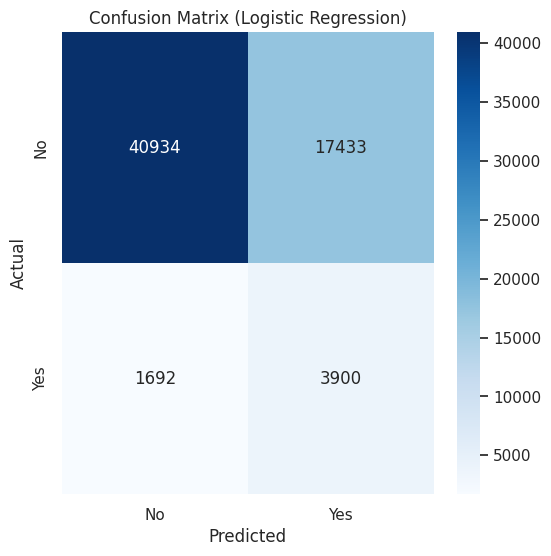

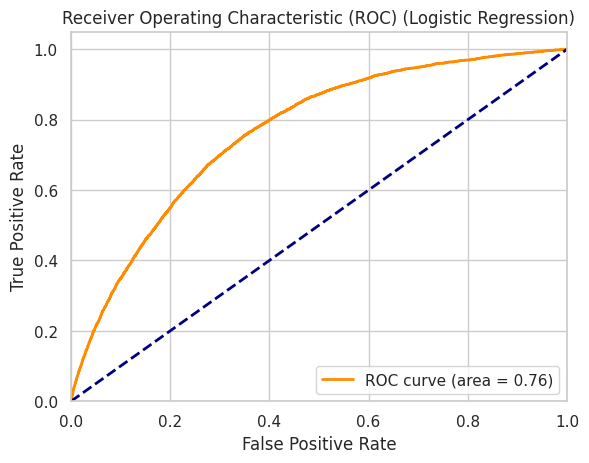

Logistic Regression - Accuracy: 0.70
Logistic Regression - Precision: 0.18
Logistic Regression - Recall: 0.70
Logistic Regression - F1 Score: 0.29
Logistic Regression - AUC ROC: 0.76


In [ ]:

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             roc_curve, auc, classification_report)
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_resampled, y_train_resampled)


y_pred_lg = log_reg_model.predict(X_test)
y_prob = log_reg_model.predict_proba(X_test)[:, 1]


accuracy_logreg = accuracy_score(y_test, y_pred_lg)
precision_logreg = precision_score(y_test, y_pred_lg)
recall_logreg = recall_score(y_test, y_pred_lg)
f1_logreg = f1_score(y_test, y_pred_lg)
roc_auc_logreg = roc_auc_score(y_test, y_prob)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lg))


cm = confusion_matrix(y_test, y_pred_lg)


plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()


print(f"Logistic Regression - Accuracy: {accuracy_logreg:.2f}")
print(f"Logistic Regression - Precision: {precision_logreg:.2f}")
print(f"Logistic Regression - Recall: {recall_logreg:.2f}")
print(f"Logistic Regression - F1 Score: {f1_logreg:.2f}")
print(f"Logistic Regression - AUC ROC: {roc_auc_logreg:.2f}")


**Random Forest model**


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     58367
           1       0.23      0.30      0.26      5592

    accuracy                           0.85     63959
   macro avg       0.58      0.60      0.59     63959
weighted avg       0.87      0.85      0.86     63959



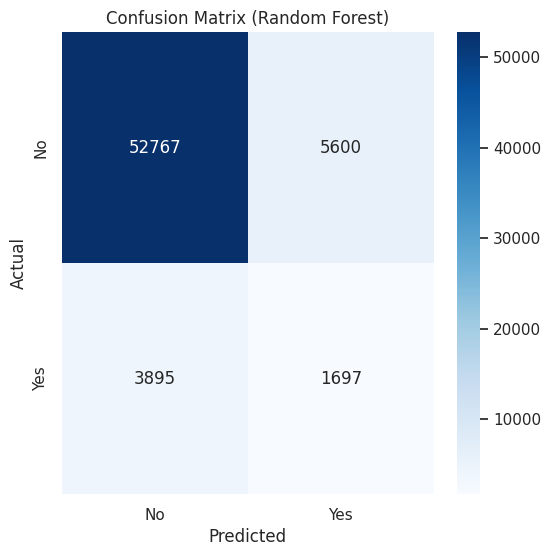

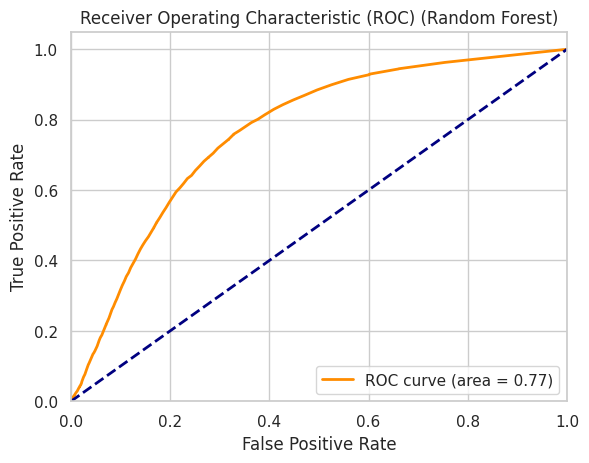

Random Forest - Accuracy: 0.85
Random Forest - Precision: 0.23
Random Forest - Recall: 0.30
Random Forest - F1 Score: 0.26
Random Forest - AUC ROC: 0.77


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix, roc_curve, auc)
import matplotlib.pyplot as plt
import seaborn as sns

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)


plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix (Random Forest)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_value_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) (Random Forest)')
plt.legend(loc='lower right')
plt.show()


print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest - Precision: {precision_rf:.2f}")
print(f"Random Forest - Recall: {recall_rf:.2f}")
print(f"Random Forest - F1 Score: {f1_rf:.2f}")
print(f"Random Forest - AUC ROC: {roc_auc_rf:.2f}")


**XGB MOdel**

In [ ]:
# XGBoost Classifier
import xgboost as xgb
xgb_model = xgb.XGBClassifier(scale_pos_weight=1, random_state=50)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



xgb_model = xgb.XGBClassifier(scale_pos_weight=1, random_state=50)
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)


cm_xgb = confusion_matrix(y_test, y_pred_xgb)


print("Confusion Matrix:")
print(cm_xgb)

Confusion Matrix:
[[57313  1054]
 [ 5027   565]]



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.35      0.10      0.16      5592

    accuracy                           0.90     63959
   macro avg       0.63      0.54      0.55     63959
weighted avg       0.87      0.90      0.88     63959



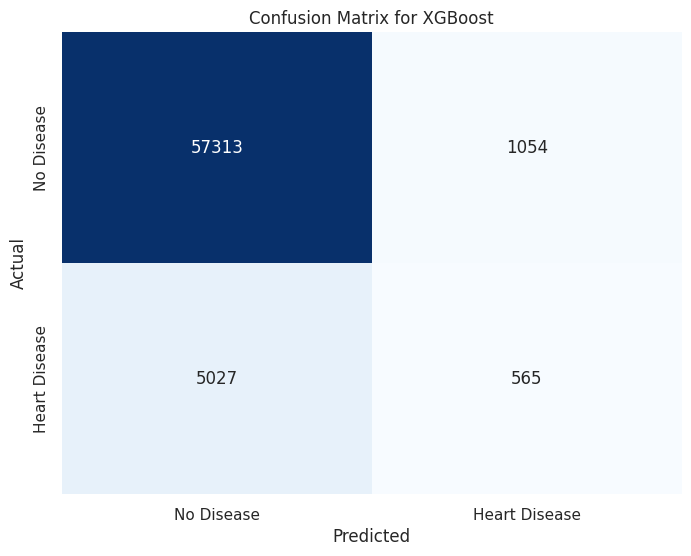

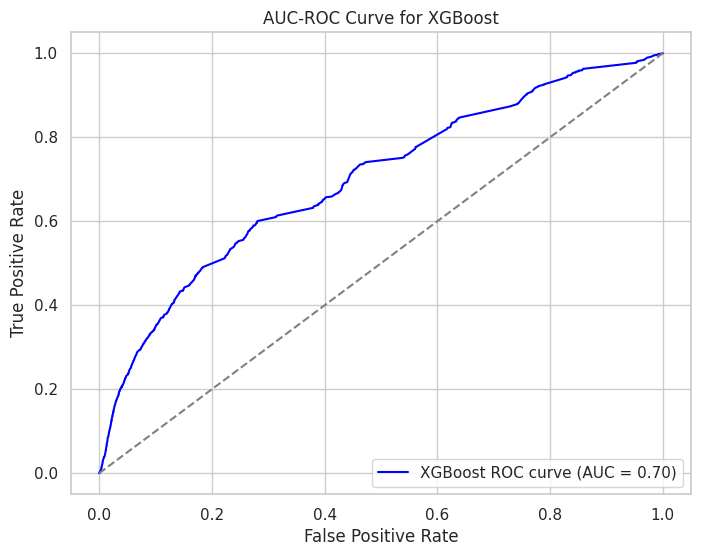

XGBoost Accuracy: 0.90
XGBoost Precision: 0.35
XGBoost Recall: 0.10
XGBoost F1-Score: 0.16


In [ ]:

import matplotlib.pyplot as plt


print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


plt.figure(figsize=(8,6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Disease", "Heart Disease"],
            yticklabels=["No Disease", "Heart Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost")
plt.show()


y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"XGBoost ROC curve (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print(f"XGBoost Precision: {precision_xgb:.2f}")
print(f"XGBoost Recall: {recall_xgb:.2f}")
print(f"XGBoost F1-Score: {f1_xgb:.2f}")